# Exercise 1 - Part B 

In [134]:
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

In [135]:
def traintestsplit(data, splitize):
    
        train = data.sample(frac = splitize)
        test = data.drop(train.index)
        train.reset_index(inplace = True)
        test.reset_index(inplace = True)
        return train, test

## Load Data

In [136]:
Data = pd.read_csv("SMSSpamD2/SMSSpamCollection", sep="\t", header=None)
Data.columns = ['Type', 'Message']
Data.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Encoding the target variables

In [137]:
Data['Type'] = pd.get_dummies(Data.Type)

## Split into train set and test set

### Splitting the data

In [138]:
trainSet, testSet = traintestsplit(Data, 0.7)

In [139]:
yTrain = trainSet.Type.values
xTrain = trainSet.Message.values

yTest = testSet.Type.values
xTest = testSet.Message.values


### Creating set of stopwords 

In [140]:
stopwordlist = stopwords.words("english")
stopwords = set(stopwordlist)

### Creating a pipeline for vectorizer and classifier

In [141]:
Pipe = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words = stopwords, lowercase = True)),
    ("classifier", SVC())
])

### Parameter grid for grid search

In [142]:
param_grid = {
    "classifier__C":np.arange(0.4, 20, 0.4),
    "classifier__kernel":["rbf", "linear"],
}

### Performing Grid Search

In [143]:
model = GridSearchCV(Pipe, cv = 5, n_jobs = 2, param_grid = param_grid)

model.fit(xTrain, yTrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'classifier__kernel': ['rbf', 'linear'], 'classifier__C': array([ 0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4,
        4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,
        9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8, 13.2,
       13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2, 17.6,
       18. , 18.4, 18.8, 19.2, 19.6])},
       pre_dispatch='2*n_jobs', refit=True,

### Best hyperparameters

In [144]:
model.best_params_

{'classifier__C': 7.6000000000000005, 'classifier__kernel': 'linear'}

### Best MSE Test scores

In [148]:
results = pd.DataFrame()
results["Mean Test Score"] = model.cv_results_["mean_test_score"]
results["Mean Train Score"] = model.cv_results_["mean_train_score"]
results["Cost"] = model.cv_results_['param_classifier__C']
results["Kernel"] = model.cv_results_['param_classifier__kernel']

In [156]:
results[results.Kernel=='linear']

,Mean Test Score,Mean Train Score,Cost,Kernel
1,0.978974,0.983077,0.4,linear
3,0.983077,0.993910,0.8,linear
5,0.984103,0.998333,1.2,linear
7,0.984615,0.998910,1.6,linear
9,0.984615,0.999487,2,linear
11,0.984615,0.999615,2.4,linear
13,0.984615,0.999808,2.8,linear
15,0.984615,1.000000,3.2,linear
17,0.984615,1.000000,3.6,linear
19,0.984359,1.000000,4,linear


Best Model: 

Kernel:  linear 
Cost C:  7.6000000000000005 
MSE Test:  0.9849


[]

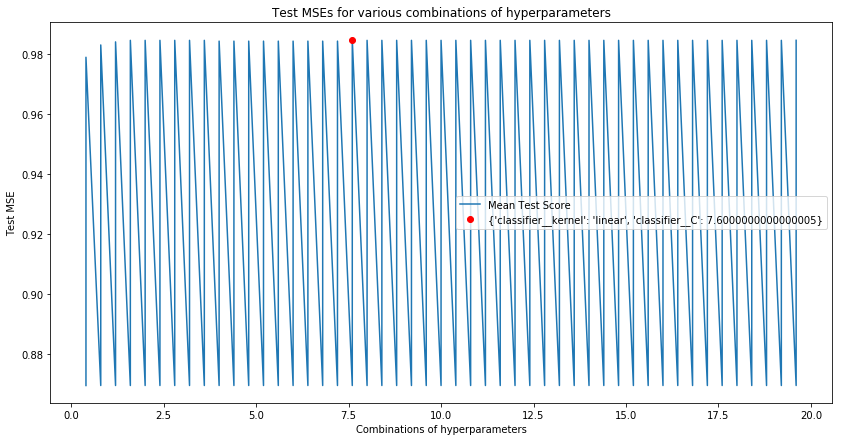

In [157]:
maxindex = model.best_index_
print("Best Model: \n")
print("Kernel: ",model.best_params_['classifier__kernel'],"\nCost C: ",model.best_params_['classifier__C'],"\nMSE Test: ",round(model.best_score_,4))
plt.figure(figsize=(14,7))
plt.plot(results.Cost,results["Mean Test Score"])
plt.plot(results.Cost[maxindex],results["Mean Test Score"][maxindex],'ro',label = model.best_params_)
plt.title("Test MSEs for various combinations of hyperparameters")
plt.xlabel("Combinations of hyperparameters")
plt.ylabel("Test MSE")
plt.legend()
plt.plot()

[]

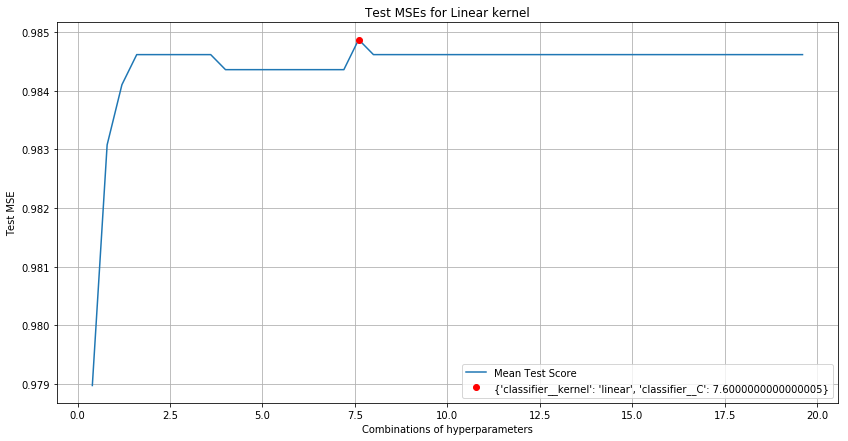

In [158]:
plt.figure(figsize=(14,7))
plt.plot(results.Cost[results.Kernel == "linear"],results["Mean Test Score"][results.Kernel == "linear"])
plt.plot(results.Cost[maxindex],results["Mean Test Score"][maxindex],'ro',label = model.best_params_)
plt.title("Test MSEs for Linear kernel")
plt.xlabel("Combinations of hyperparameters")
plt.ylabel("Test MSE")
plt.legend()
plt.grid()
plt.plot()

In [161]:
Pipe = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words = stopwords, lowercase = True)),
    ("classifier", SVC(C=7.6,kernel='linear'))
                       
])

In [162]:
Pipe.fit(xTrain,yTrain)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [163]:
ypred = Pipe.predict(xTest)

In [164]:
print(classification_report(yTest,ypred,target_names=["ham","spam"]))

              precision    recall  f1-score   support

         ham       0.98      0.89      0.93       238
        spam       0.98      1.00      0.99      1434

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [165]:
mean_squared_error(yTest,ypred)

0.019138755980861243

In [166]:
Predictions = pd.DataFrame()
Predictions["Ground Truth"] = yTest
Predictions["Prediction"] = ypred

In [169]:
Predictions[Predictions["Ground Truth"] == 1] = "spam"
Predictions[Predictions["Ground Truth"] == 0] = "ham"

In [170]:
Predictions.head(20)

,Ground Truth,Prediction
0,spam,spam
1,ham,ham
2,spam,spam
3,spam,spam
4,ham,ham
5,ham,ham
6,ham,ham
7,ham,ham
8,ham,ham
9,ham,ham


In [171]:
treeclassifier = DecisionTreeClassifier()

In [172]:
treeclassifier = DecisionTreeClassifier()

Pipe = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words = stopwords, lowercase = True)),
    ("classifier", DecisionTreeClassifier())
])

### Parameter grid for grid search

In [173]:
param_grid = {
    "classifier__max_depth":np.arange(1, 5, 1)
}

### Performing Grid Search

In [174]:
treemodel = GridSearchCV(Pipe, cv = 5, n_jobs = 3,param_grid=param_grid)

treemodel.fit(xTrain, yTrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'classifier__max_depth': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [175]:
treemodel.best_params_

{'classifier__max_depth': 4}

In [176]:
results = pd.DataFrame()
results["Mean Test Score"] = treemodel.cv_results_["mean_test_score"]
results["Mean Train Score"] = treemodel.cv_results_["mean_train_score"]
results["Depth"] = treemodel.cv_results_['param_classifier__max_depth']

In [177]:
print("Results with best Mean Test scores:")
results

Results with best Mean Test scores:


,Mean Test Score,Mean Train Score,Depth
0,0.882821,0.887500,1
1,0.920513,0.927115,2
2,0.926410,0.941859,3
3,0.935641,0.949231,4


Best Model: 

Depth:  4 
MSE Test:  0.9356


[]

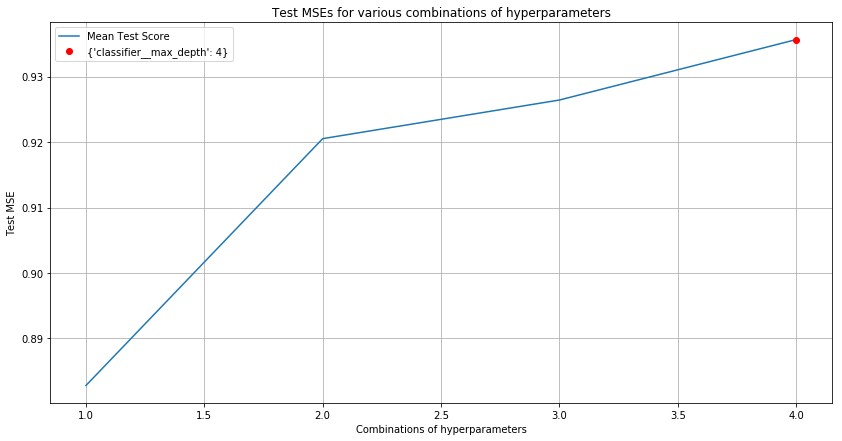

In [178]:
maxindex = treemodel.best_index_
print("Best Model: \n")
print("Depth: ",treemodel.best_params_['classifier__max_depth'],"\nMSE Test: ",round(treemodel.best_score_,4))
plt.figure(figsize=(14,7))
plt.plot(results.Depth,results["Mean Test Score"])
plt.plot(results.Depth[maxindex],results["Mean Test Score"][maxindex],'ro',label = treemodel.best_params_)
plt.title("Test MSEs for various combinations of hyperparameters")
plt.xlabel("Combinations of hyperparameters")
plt.ylabel("Test MSE")
plt.legend()
plt.grid()
plt.plot()

In [180]:
Pipe = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words = stopwords, lowercase = True)),
    ("classifier", DecisionTreeClassifier(max_depth=4))
])

In [181]:
Pipe.fit(xTrain,yTrain)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [182]:
ypred = Pipe.predict(xTest)

In [183]:
print(classification_report(yTest,ypred,target_names=["ham","spam"]))

              precision    recall  f1-score   support

         ham       0.81      0.62      0.70       238
        spam       0.94      0.98      0.96      1434

   micro avg       0.93      0.93      0.93      1672
   macro avg       0.87      0.80      0.83      1672
weighted avg       0.92      0.93      0.92      1672



In [184]:
mean_squared_error(yTest,ypred)

0.07476076555023924

In [185]:
Predictions = pd.DataFrame()
Predictions["Ground Truth"] = yTest
Predictions["Prediction"] = ypred

In [188]:
Predictions[Predictions["Ground Truth"] == 1] = "spam"
Predictions[Predictions["Ground Truth"] == 0] = "ham"

In [189]:
Predictions.head(20)

,Ground Truth,Prediction
0,spam,spam
1,ham,ham
2,spam,spam
3,spam,spam
4,ham,ham
5,ham,ham
6,ham,ham
7,ham,ham
8,ham,ham
9,ham,ham
